In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

In [2]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'] = iris.target
sns.pairplot(df,hue='target')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

# Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

<figure style="text-align:center;">
    <img src='http://www.nabla.hr/SlopeInterceptLineEqu.gif' alt='lin_reg'/>
    <figcaption>This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept.</figcaption>
</figure>

In [8]:
X = df['petal length (cm)'].values
y = df['petal width (cm)'].values

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

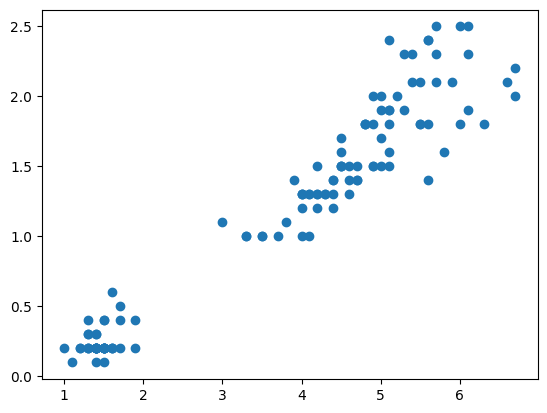

In [10]:
plt.scatter(X_train, y_train)
plt.show()

In [11]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train)) # Number of elements in X

# Performing Gradient Descent 
losses = []
for i in range(epochs): 
    y_pred = m*X_train + c  # The current predicted value of Y

    residuals = y_pred - y_train
    loss = np.sum(residuals ** 2)
    losses.append(loss)
    D_m = (-2/n) * sum(X_train * residuals)  # Derivative wrt m
    D_c = (-2/n) * sum(residuals)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    if i % 100 == 0:
        print(np.mean(y_train-y_pred))
    

1.1833333333333333
1.7179171300125984
2.480135367751928
3.5668735982576267
5.11625355442077
7.325183987954845
10.474381449517315
14.964040349069002
21.364684815802534
30.48966399621931


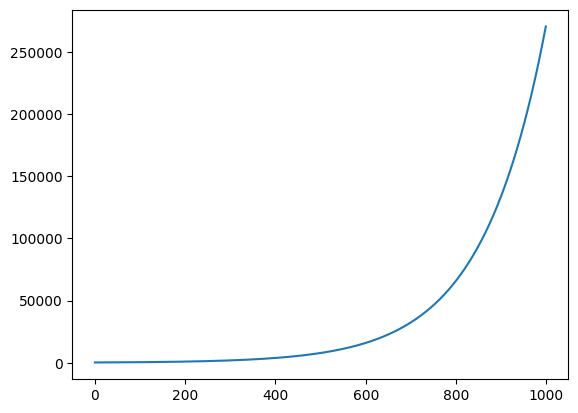

In [12]:
# Visualize the loss
plt.plot(losses)

In [13]:
# Run the model on the test set
pred = []
for X in X_test:
    y_pred = m*X + c
    pred.append(y_pred)
print(pred)
print(y_test)

[-52.748698880741834, -20.590559705411046, -76.33133427598442, -50.60482293571978, -53.82063685325286, -18.446683760389, -40.957381183120546, -57.03645077078593, -50.60482293571978, -44.17319510065362, -57.03645077078593, -17.37474578787797, -16.302807815366947, -18.446683760389, -18.446683760389, -52.748698880741834, -64.54001657836312, -44.17319510065362, -50.60482293571978, -62.39614063334107, -19.518621732900023, -54.892574825763894, -19.518621732900023, -62.39614063334107, -70.97164441342929, -58.10838874329697, -64.54001657836312, -65.61195455087415, -17.37474578787797, -19.518621732900023]
[1.2 0.3 2.3 1.5 1.4 0.4 1.3 2.3 1.5 1.2 2.  0.1 0.2 0.1 0.3 1.6 2.2 1.1
 1.3 2.2 0.2 1.8 0.4 2.1 2.  2.3 1.8 2.3 0.3 0.2]


In [14]:
# Calculate the Mean Absolue Error
print("Mean Absolute Error:", np.mean(np.abs(y_pred - y_test)))

# Calculate the Mean Squared Error
print("Mean Squared Error:", np.mean((y_pred - y_test)**2))


Mean Absolute Error: 20.781955066233362
Mean Squared Error: 432.52531193049776


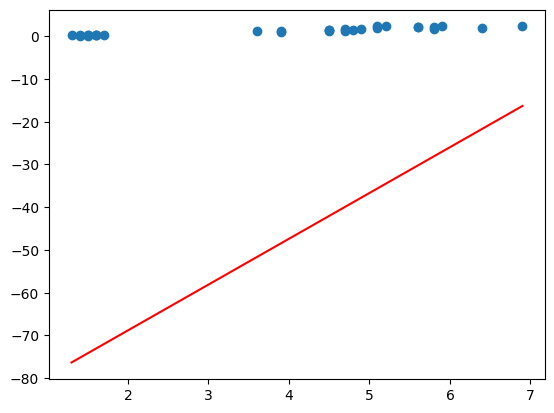

In [15]:
# Making predictions
y_pred = m*X_test + c

plt.scatter(X_test, y_test)
plt.plot([min(X_test), max(X_test)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()